<a href="https://colab.research.google.com/github/psylanrex/notebooks/blob/master/Home_purchase_vs_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"k00k13","key":"ad5da1ff0fa7d76d57f7bf5cf08e7efa"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d zhenyufan/zillow-housing-price -p /content

 55% 5.00M/9.12M [00:00<00:00, 25.2MB/s]
100% 9.12M/9.12M [00:00<00:00, 36.1MB/s]


In [5]:
!kaggle datasets download -d zillow/rent-index -p /content

  0% 0.00/3.37M [00:00<?, ?B/s]
100% 3.37M/3.37M [00:00<00:00, 112MB/s]


In [6]:
!unzip \*.zip

Archive:  zillow-housing-price.zip
  inflating: Zillow Single Family Residence.csv  

Archive:  rent-index.zip
  inflating: price.csv               
  inflating: pricepersqft.csv        

2 archives were successfully processed.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
house_price_df = pd.read_csv('/content/Zillow Single Family Residence.csv')
house_price_df.head()

,Unnamed: 0,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,...,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,...,924400,935600,947200,950900,952700,959000,966400,970300,973200,973300,970600,971800,977800,985200,992900,997600,996000,993100,991500,990000,991400,998200,1004000,1006800,1008400,1011300,1015500,1022000,1028900,1034500,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900
1,1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,...,318600,321800,324400,326400,327400,326900,327300,328900,330000,330000,328900,327500,326300,325300,324700,324700,323700,322100,320800,320400,320300,320900,320900,320300,319800,320200,320800,321100,322700,326500,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500
2,2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,...,1199200,1206600,1218000,1226400,1230300,1234700,1240300,1244700,1245800,1245300,1243700,1243400,1245000,1250800,1259300,1266600,1270800,1274500,1278900,1282600,1285800,1288100,1288500,1287500,1289200,1295000,1301100,1304300,1310100,1315300,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300
3,3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,...,115300,115400,115700,116200,116200,115700,115100,114700,114300,114000,114000,113800,114000,114800,115600,116200,116800,117400,117800,118200,118700,119000,119100,119400,119900,120200,120200,120100,120300,120500,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400
4,4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,96400.0,96200.0,96100.0,96200.0,96300.0,96600.0,97000.0,97500.0,98000.0,98400.0,98800.0,99200.0,99500.0,99700.0,100000.0,100200.0,100400.0,100700.0,101100.0,101800.0,102900.0,104300.0,...,151100,152200,153000,154100,156000,157800,159600,161700,164200,166100,167400,168100,168400,168400,168400,168400,168200,167900,167400,167000,166900,166800,166800,167300,168300,169500,170700,172100,173500,174600,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700


In [10]:
rent_index_df = pd.read_csv('/content/rent-index.csv')
rent_index_df.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,November 2011,December 2011,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,February 2013,March 2013,April 2013,May 2013,June 2013,July 2013,August 2013,...,October 2013,November 2013,December 2013,January 2014,February 2014,March 2014,April 2014,May 2014,June 2014,July 2014,August 2014,September 2014,October 2014,November 2014,December 2014,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1746.0,1752.0,1764.0,1778.0,1792,1804,1813,1814,1810,1805,1806,1817,1831,1851,1870,1888,1901,1918,1941,1968,1987,...,2004,2014,2026,2040,2052,2058,2064,2071,2080,2104,2132,2169,2191,2206,2214,2216,2229,2241,2248,2253,2251,2246,2259,2276,2304,2322,2334,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,2189.0,2189.0,2188.0,2191.0,2189.0,2186.0,2183.0,2183.0,2182.0,2178.0,2172.0,2175.0,2177.0,2183,2186,2190,2192,2189,2189,2185,2183,2186,2194,2203,2212,2222,2229,2236,2239,2246,...,2267,2278,2283,2285,2283,2285,2283,2285,2288,2303,2320,2343,2367,2395,2423,2445,2464,2479,2493,2502,2511,2521,2536,2546,2555,2564,2577,2596,2607,2622,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,1526.0,1517.0,1507.0,1497.0,1493.0,1491.0,1489.0,1485.0,1480.0,1483.0,1484.0,1485.0,1489.0,1494,1496,1493,1491,1491,1498,1509,1513,1517,1514,1511,1512,1527,1544,1560,1562,1568,...,1584,1585,1593,1606,1616,1619,1614,1612,1615,1628,1636,1649,1658,1672,1677,1677,1668,1668,1669,1667,1668,1670,1668,1660,1652,1649,1653,1668,1671,1682,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,1203.0,1205.0,1204.0,1199.0,1194.0,1190.0,1188.0,1186.0,1188.0,1190.0,1194.0,1196.0,1199.0,1200,1199,1197,1193,1193,1197,1201,1203,1199,1201,1208,1218,1227,1236,1248,1258,1265,...,1277,1287,1295,1297,1296,1293,1294,1296,1301,1310,1322,1334,1344,1355,1367,1377,1384,1389,1394,1402,1410,1419,1425,1428,1428,1429,1431,1436,1439,1442,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,1080.0,1080.0,1083.0,1082.0,1082.0,1085.0,1095.0,1098.0,1094.0,1085.0,1080.0,1083.0,1087.0,1091,1092,1094,1096,1095,1092,1090,1089,1087,1083,1081,1083,1089,1093,1095,1094,1093,...,1083,1082,1085,1092,1098,1105,1108,1108,1106,1111,1121,1136,1150,1164,1175,1182,1185,1183,1178,1176,1179,1179,1177,1175,1179,1184,1189,1196,1200,1205,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [37]:
house_price_timeframe = house_price_df[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName'] + list(house_price_df.loc[:, '2010-11':'2017-01'])]
house_price_timeframe.head()

,RegionID,RegionName,City,State,Metro,CountyName,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,738600.0,732000.0,730800.0,732200.0,732500.0,731300.0,731500.0,731400.0,732400.0,735100.0,736500.0,736600.0,735900.0,739000.0,739300.0,735600.0,735700.0,741600.0,746200.0,752200.0,762000.0,772800.0,781400.0,788800.0,795800.0,800900.0,804200.0,808100.0,813200.0,819200.0,827900.0,838200.0,848300.0,853800.0,...,856800.0,855400.0,854500.0,858500.0,862700.0,866500.0,874900.0,885100.0,890800.0,893800.0,894100.0,891300.0,889700.0,891900.0,894300.0,895000,897300,903700,911300,915600,916200,916700,918600,924400,935600,947200,950900,952700,959000,966400,970300,973200,973300,970600,971800,977800,985200,992900,997600,996000
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,249700.0,248100.0,247400.0,248500.0,249400.0,249200.0,249300.0,249500.0,249500.0,249400.0,248900.0,248000.0,247100.0,247000.0,248600.0,251200.0,252600.0,252600.0,252700.0,252700.0,252400.0,252500.0,253300.0,254200.0,255200.0,256600.0,257000.0,256500.0,256600.0,257300.0,258400.0,260700.0,263900.0,266900.0,...,270900.0,273100.0,275800.0,277700.0,279600.0,282100.0,284500.0,286200.0,288300.0,290700.0,293100.0,295600.0,298200.0,300200.0,301500.0,301800,302200,303700,306600,309300,311900,314100,316000,318600,321800,324400,326400,327400,326900,327300,328900,330000,330000,328900,327500,326300,325300,324700,324700,323700
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,935500.0,927000.0,924800.0,926800.0,925200.0,918500.0,914200.0,912100.0,913700.0,919800.0,924800.0,925000.0,924800.0,930400.0,930800.0,925800.0,927300.0,940100.0,954200.0,967900.0,978100.0,986000.0,995100.0,1002400.0,1005000.0,1005100.0,1008500.0,1015700.0,1027500.0,1040800.0,1055300.0,1071300.0,1090600.0,1108500.0,...,1135600.0,1142400.0,1145800.0,1148400.0,1150700.0,1152700.0,1157700.0,1162400.0,1165200.0,1169400.0,1174900.0,1175700.0,1174000.0,1176300.0,1180100.0,1178600,1176700,1180800,1187600,1193500,1198300,1199600,1198000,1199200,1206600,1218000,1226400,1230300,1234700,1240300,1244700,1245800,1245300,1243700,1243400,1245000,1250800,1259300,1266600,1270800
3,93144,79936,El Paso,TX,El Paso,El Paso County,118700.0,118800.0,119000.0,118800.0,118300.0,118100.0,117600.0,116800.0,116500.0,116100.0,114800.0,113500.0,112800.0,112700.0,112400.0,112200.0,112400.0,112800.0,113200.0,113400.0,113100.0,112800.0,112900.0,112900.0,112900.0,112800.0,113000.0,113400.0,113600.0,113500.0,113300.0,113000.0,112900.0,112900.0,...,112500.0,112300.0,112000.0,111500.0,111500.0,112100.0,112600.0,112700.0,113100.0,113900.0,114300.0,114400.0,114300.0,114200.0,114300.0,114700,115000,115100,115300,115700,115900,115600,115300,115300,115400,115700,116200,116200,115700,115100,114700,114300,114000,114000,113800,114000,114800,115600,116200,116800
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,122400.0,121400.0,120800.0,120200.0,119900.0,120100.0,120000.0,119600.0,119000.0,118100.0,117100.0,116800.0,116700.0,116400.0,116000.0,115900.0,115800.0,115200.0,114700.0,114700.0,115000.0,115500.0,115800.0,115900.0,116200.0,116700.0,117300.0,117900.0,118500.0,119300.0,120500.0,121800.0,123000.0,124300.0,...,126100.0,126800.0,127600.0,128400.0,129100.0,130100.0,131300.0,132600.0,133700.0,134500.0,135300.0,136400.0,137600.0,138800.0,140000.0,141000,142000,143300,144800,146100,147200,148500,149700,151100,152200

In [24]:
month_dict = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}
def convert_time_col(day_string):
  month, year = day_string.split(' ')
  num_month = month_dict[month]
  return year + '-' + num_month

convert_time_col('December 2010')

'2010-12'

In [32]:
rent_index_timeframe = rent_index_df.loc[:,'November 2010':'January 2017']
rent_index_timeframe.head()

,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,November 2011,December 2011,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,February 2013,March 2013,April 2013,May 2013,June 2013,July 2013,August 2013,September 2013,October 2013,November 2013,December 2013,January 2014,February 2014,March 2014,April 2014,May 2014,June 2014,July 2014,August 2014,September 2014,October 2014,November 2014,December 2014,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1746.0,1752.0,1764.0,1778.0,1792,1804,1813,1814,1810,1805,1806,1817,1831,1851,1870,1888,1901,1918,1941,1968,1987,1999,2004,2014,2026,2040,2052,2058,2064,2071,2080,2104,2132,2169,2191,2206,2214,2216,2229,2241,2248,2253,2251,2246,2259,2276,2304,2322,2334,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,2184.0,2184.0,2183.0,2188.0,2189.0,2189.0,2188.0,2191.0,2189.0,2186.0,2183.0,2183.0,2182.0,2178.0,2172.0,2175.0,2177.0,2183,2186,2190,2192,2189,2189,2185,2183,2186,2194,2203,2212,2222,2229,2236,2239,2246,2255,2267,2278,2283,2285,2283,2285,2283,2285,2288,2303,2320,2343,2367,2395,2423,2445,2464,2479,2493,2502,2511,2521,2536,2546,2555,2564,2577,2596,2607,2622,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,1563.0,1555.0,1547.0,1537.0,1526.0,1517.0,1507.0,1497.0,1493.0,1491.0,1489.0,1485.0,1480.0,1483.0,1484.0,1485.0,1489.0,1494,1496,1493,1491,1491,1498,1509,1513,1517,1514,1511,1512,1527,1544,1560,1562,1568,1574,1584,1585,1593,1606,1616,1619,1614,1612,1615,1628,1636,1649,1658,1672,1677,1677,1668,1668,1669,1667,1668,1670,1668,1660,1652,1649,1653,1668,1671,1682,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,1198.0,1199.0,1199.0,1200.0,1203.0,1205.0,1204.0,1199.0,1194.0,1190.0,1188.0,1186.0,1188.0,1190.0,1194.0,1196.0,1199.0,1200,1199,1197,1193,1193,1197,1201,1203,1199,1201,1208,1218,1227,1236,1248,1258,1265,1269,1277,1287,1295,1297,1296,1293,1294,1296,1301,1310,1322,1334,1344,1355,1367,1377,1384,1389,1394,1402,1410,1419,1425,1428,1428,1429,1431,1436,1439,1442,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,1092.0,1099.0,1094.0,1087.0,1080.0,1080.0,1083.0,1082.0,1082.0,1085.0,1095.0,1098.0,1094.0,1085.0,1080.0,1083.0,1087.0,1091,1092,1094,1096,1095,1092,1090,1089,1087,1083,1081,1083,1089,1093,1095,1094,1093,1087,1083,1082,1085,1092,1098,1105,1108,1108,1106,1111,1121,1136,1150,1164,1175,1182,1185,1183,1178,1176,1179,1179,1177,1175,1179,1184,1189,1196,1200,1205,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [33]:
rent_index_timeframe.columns = list(map(lambda x: convert_time_col(x), rent_index_timeframe.columns))
rent_index_timeframe.head()

,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1746.0,1752.0,1764.0,1778.0,1792,1804,1813,1814,1810,1805,1806,1817,1831,1851,1870,1888,1901,1918,1941,1968,1987,1999,2004,2014,2026,2040,2052,2058,2064,2071,2080,2104,2132,2169,2191,2206,2214,2216,2229,2241,2248,2253,2251,2246,2259,2276,2304,2322,2334,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,2184.0,2184.0,2183.0,2188.0,2189.0,2189.0,2188.0,2191.0,2189.0,2186.0,2183.0,2183.0,2182.0,2178.0,2172.0,2175.0,2177.0,2183,2186,2190,2192,2189,2189,2185,2183,2186,2194,2203,2212,2222,2229,2236,2239,2246,2255,2267,2278,2283,2285,2283,2285,2283,2285,2288,2303,2320,2343,2367,2395,2423,2445,2464,2479,2493,2502,2511,2521,2536,2546,2555,2564,2577,2596,2607,2622,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,1563.0,1555.0,1547.0,1537.0,1526.0,1517.0,1507.0,1497.0,1493.0,1491.0,1489.0,1485.0,1480.0,1483.0,1484.0,1485.0,1489.0,1494,1496,1493,1491,1491,1498,1509,1513,1517,1514,1511,1512,1527,1544,1560,1562,1568,1574,1584,1585,1593,1606,1616,1619,1614,1612,1615,1628,1636,1649,1658,1672,1677,1677,1668,1668,1669,1667,1668,1670,1668,1660,1652,1649,1653,1668,1671,1682,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,1198.0,1199.0,1199.0,1200.0,1203.0,1205.0,1204.0,1199.0,1194.0,1190.0,1188.0,1186.0,1188.0,1190.0,1194.0,1196.0,1199.0,1200,1199,1197,1193,1193,1197,1201,1203,1199,1201,1208,1218,1227,1236,1248,1258,1265,1269,1277,1287,1295,1297,1296,1293,1294,1296,1301,1310,1322,1334,1344,1355,1367,1377,1384,1389,1394,1402,1410,1419,1425,1428,1428,1429,1431,1436,1439,1442,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,1092.0,1099.0,1094.0,1087.0,1080.0,1080.0,1083.0,1082.0,1082.0,1085.0,1095.0,1098.0,1094.0,1085.0,1080.0,1083.0,1087.0,1091,1092,1094,1096,1095,1092,1090,1089,1087,1083,1081,1083,1089,1093,1095,1094,1093,1087,1083,1082,1085,1092,1098,1105,1108,1108,1106,1111,1121,1136,1150,1164,1175,1182,1185,1183,1178,1176,1179,1179,1177,1175,1179,1184,1189,1196,1200,1205,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [36]:
rent_price_timeframe = pd.concat([rent_index_df[['City Code', 'City', 'Metro', 'County', 'State']], rent_index_timeframe], axis=1)
rent_price_timeframe.head()

,City Code,City,Metro,County,State,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01
0,6181,New York,New York,Queens,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1746.0,1752.0,1764.0,1778.0,1792,1804,1813,1814,1810,1805,1806,1817,1831,1851,1870,1888,1901,1918,1941,1968,1987,1999,2004,2014,2026,2040,2052,2058,2064,2071,2080,2104,2132,2169,2191,2206,2214,2216,2229,2241,2248,2253,2251,2246,2259,2276,2304,2322,2334,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2184.0,2184.0,2183.0,2188.0,2189.0,2189.0,2188.0,2191.0,2189.0,2186.0,2183.0,2183.0,2182.0,2178.0,2172.0,2175.0,2177.0,2183,2186,2190,2192,2189,2189,2185,2183,2186,2194,2203,2212,2222,2229,2236,2239,2246,2255,2267,2278,2283,2285,2283,2285,2283,2285,2288,2303,2320,2343,2367,2395,2423,2445,2464,2479,2493,2502,2511,2521,2536,2546,2555,2564,2577,2596,2607,2622,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,1563.0,1555.0,1547.0,1537.0,1526.0,1517.0,1507.0,1497.0,1493.0,1491.0,1489.0,1485.0,1480.0,1483.0,1484.0,1485.0,1489.0,1494,1496,1493,1491,1491,1498,1509,1513,1517,1514,1511,1512,1527,1544,1560,1562,1568,1574,1584,1585,1593,1606,1616,1619,1614,1612,1615,1628,1636,1649,1658,1672,1677,1677,1668,1668,1669,1667,1668,1670,1668,1660,1652,1649,1653,1668,1671,1682,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,1198.0,1199.0,1199.0,1200.0,1203.0,1205.0,1204.0,1199.0,1194.0,1190.0,1188.0,1186.0,1188.0,1190.0,1194.0,1196.0,1199.0,1200,1199,1197,1193,1193,1197,1201,1203,1199,1201,1208,1218,1227,1236,1248,1258,1265,1269,1277,1287,1295,1297,1296,1293,1294,1296,1301,1310,1322,1334,1344,1355,1367,1377,1384,1389,1394,1402,1410,1419,1425,1428,1428,1429,1431,1436,1439,1442,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,1092.0,1099.0,1094.0,1087.0,1080.0,1080.0,1083.0,1082.0,1082.0,1085.0,1095.0,1098.0,1094.0,1085.0,1080.0,1083.0,1087.0,1091,1092,1094,1096,1095,1092,1090,1089,1087,1083,1081,1083,1089,1093,1095,1094,1093,1087,1083,1082,1085,1092,1098,1105,1108,1108,1106,1111,1121,1136,1150,1164,1175,1182,1185,1183,1178,1176,1179,1179,1177,1175,1179,1184,1189,1196,1200,1205,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


## Explore and Compare House Price v. Rent Price Data

In [41]:
house_price_timeframe.rename(columns={'RegionName': 'ZipCode', 'CountyName': 'County'}, inplace=True)
house_price_timeframe['County'] = house_price_timeframe['County'].str.replace(' County', '')
house_price_timeframe.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,RegionID,ZipCode,City,State,Metro,County,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook,738600.0,732000.0,730800.0,732200.0,732500.0,731300.0,731500.0,731400.0,732400.0,735100.0,736500.0,736600.0,735900.0,739000.0,739300.0,735600.0,735700.0,741600.0,746200.0,752200.0,762000.0,772800.0,781400.0,788800.0,795800.0,800900.0,804200.0,808100.0,813200.0,819200.0,827900.0,838200.0,848300.0,853800.0,...,856800.0,855400.0,854500.0,858500.0,862700.0,866500.0,874900.0,885100.0,890800.0,893800.0,894100.0,891300.0,889700.0,891900.0,894300.0,895000,897300,903700,911300,915600,916200,916700,918600,924400,935600,947200,950900,952700,959000,966400,970300,973200,973300,970600,971800,977800,985200,992900,997600,996000
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris,249700.0,248100.0,247400.0,248500.0,249400.0,249200.0,249300.0,249500.0,249500.0,249400.0,248900.0,248000.0,247100.0,247000.0,248600.0,251200.0,252600.0,252600.0,252700.0,252700.0,252400.0,252500.0,253300.0,254200.0,255200.0,256600.0,257000.0,256500.0,256600.0,257300.0,258400.0,260700.0,263900.0,266900.0,...,270900.0,273100.0,275800.0,277700.0,279600.0,282100.0,284500.0,286200.0,288300.0,290700.0,293100.0,295600.0,298200.0,300200.0,301500.0,301800,302200,303700,306600,309300,311900,314100,316000,318600,321800,324400,326400,327400,326900,327300,328900,330000,330000,328900,327500,326300,325300,324700,324700,323700
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook,935500.0,927000.0,924800.0,926800.0,925200.0,918500.0,914200.0,912100.0,913700.0,919800.0,924800.0,925000.0,924800.0,930400.0,930800.0,925800.0,927300.0,940100.0,954200.0,967900.0,978100.0,986000.0,995100.0,1002400.0,1005000.0,1005100.0,1008500.0,1015700.0,1027500.0,1040800.0,1055300.0,1071300.0,1090600.0,1108500.0,...,1135600.0,1142400.0,1145800.0,1148400.0,1150700.0,1152700.0,1157700.0,1162400.0,1165200.0,1169400.0,1174900.0,1175700.0,1174000.0,1176300.0,1180100.0,1178600,1176700,1180800,1187600,1193500,1198300,1199600,1198000,1199200,1206600,1218000,1226400,1230300,1234700,1240300,1244700,1245800,1245300,1243700,1243400,1245000,1250800,1259300,1266600,1270800
3,93144,79936,El Paso,TX,El Paso,El Paso,118700.0,118800.0,119000.0,118800.0,118300.0,118100.0,117600.0,116800.0,116500.0,116100.0,114800.0,113500.0,112800.0,112700.0,112400.0,112200.0,112400.0,112800.0,113200.0,113400.0,113100.0,112800.0,112900.0,112900.0,112900.0,112800.0,113000.0,113400.0,113600.0,113500.0,113300.0,113000.0,112900.0,112900.0,...,112500.0,112300.0,112000.0,111500.0,111500.0,112100.0,112600.0,112700.0,113100.0,113900.0,114300.0,114400.0,114300.0,114200.0,114300.0,114700,115000,115100,115300,115700,115900,115600,115300,115300,115400,115700,116200,116200,115700,115100,114700,114300,114000,114000,113800,114000,114800,115600,116200,116800
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris,122400.0,121400.0,120800.0,120200.0,119900.0,120100.0,120000.0,119600.0,119000.0,118100.0,117100.0,116800.0,116700.0,116400.0,116000.0,115900.0,115800.0,115200.0,114700.0,114700.0,115000.0,115500.0,115800.0,115900.0,116200.0,116700.0,117300.0,117900.0,118500.0,119300.0,120500.0,121800.0,123000.0,124300.0,...,126100.0,126800.0,127600.0,128400.0,129100.0,130100.0,131300.0,132600.0,133700.0,134500.0,135300.0,136400.0,137600.0,138800.0,140000.0,141000,142000,143300,144800,146100,147200,148500,149700,151100,152200,153000,154100,156000,157800,159600,161700

In [42]:
house_price_timeframe.shape

(15508, 81)

In [39]:
rent_price_timeframe.shape

(13131, 80)

In [45]:
purchase_df = house_price_timeframe.loc[:, '2010-11':'2017-01'].transpose()
purchase_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,15468,15469,15470,15471,15472,15473,15474,15475,15476,15477,15478,15479,15480,15481,15482,15483,15484,15485,15486,15487,15488,15489,15490,15491,15492,15493,15494,15495,15496,15497,15498,15499,15500,15501,15502,15503,15504,15505,15506,15507
2010-11,738600.0,249700.0,935500.0,118700.0,122400.0,119900.0,322000.0,595000.0,459300.0,2494800.0,128500.0,171200.0,198700.0,683900.0,509500.0,287100.0,369900.0,144200.0,319800.0,6886200.0,188100.0,193500.0,5727100.0,2379300.0,372100.0,158600.0,141400.0,199500.0,83500.0,181000.0,176300.0,81200.0,1103900.0,703900.0,129300.0,116400.0,190100.0,136500.0,336500.0,NaN,...,269400.0,208500.0,354400.0,378200.0,234400.0,322200.0,725900.0,184800.0,160000.0,197600.0,215900.0,197900.0,79600.0,204300.0,169200.0,523700.0,467000.0,445300.0,177200.0,669800.0,87600.0,NaN,180400.0,118600.0,96600.0,145000.0,1317100.0,245900.0,130800.0,48100.0,207600.0,177400.0,314500.0,135500.0,459300.0,190000.0,191300.0,109800.0,545600.0,215900.0
2010-12,732000.0,248100.0,927000.0,118800.0,121400.0,119300.0,310800.0,597300.0,457600.0,2506200.0,127600.0,171000.0,198800.0,682000.0,515500.0,286600.0,370600.0,143500.0,318200.0,6779600.0,187400.0,191900.0,5881600.0,2394300.0,374900.0,158100.0,140800.0,198800.0,83800.0,178900.0,176200.0,79500.0,1094600.0,703400.0,128800.0,116700.0,189600.0,136900.0,327500.0,NaN,...,268400.0,203300.0,345900.0,371000.0,230500.0,317200.0,709100.0,184200.0,159400.0,196000.0,217100.0,197800.0,77400.0,207100.0,167900.0,507000.0,461800.0,439700.0,185100.0,667000.0,87600.0,NaN,180100.0,117600.0,97600.0,143100.0,1312000.0,246500.0,131000.0,46000.0,204900.0,176800.0,311800.0,134900.0,457300.0,188700.0,188900.0,110400.0,533800.0,214200.0
2011-01,730800.0,247400.0,924800.0,119000.0,120800.0,118900.0,311500.0,601400.0,453100.0,2470700.0,126600.0,170400.0,198900.0,681500.0,520600.0,286900.0,369300.0,142600.0,318100.0,6547100.0,186300.0,190700.0,5952500.0,2391800.0,376300.0,158500.0,139600.0,198300.0,83700.0,177500.0,175600.0,78000.0,1083900.0,700900.0,128500.0,116300.0,189200.0,136700.0,328300.0,NaN,...,265800.0,199600.0,337100.0,364700.0,227600.0,313500.0,692400.0,183400.0,158100.0,194300.0,220000.0,196800.0,75600.0,208800.0,166800.0,496100.0,454700.0,435200.0,191600.0,670300.0,86900.0,NaN,179600.0,116200.0,97200.0,142800.0,1294000.0,245900.0,131000.0,43900.0,202900.0,176000.0,302400.0,132900.0,456000.0,184700.0,186200.0,111200.0,527100.0,212200.0
2011-02,732200.0,248500.0,926800.0,118800.0,120200.0,118300.0,320900.0,603500.0,452900.0,2420100.0,125900.0,169800.0,199200.0,684400.0,524800.0,285900.0,367000.0,141600.0,317200.0,6385600.0,184700.0,190000.0,5930700.0,2404400.0,375800.0,159100.0,138300.0,198300.0,83300.0,175800.0,175100.0,76200.0,1069000.0,698900.0,128000.0,115500.0,188600.0,136300.0,337000.0,NaN,...,262700.0,195000.0,331100.0,359200.0,227000.0,312000.0,668500.0,182800.0,156800.0,191800.0,221100.0,195900.0,74200.0,207300.0,165400.0,475700.0,447000.0,433500.0,196600.0,673600.0,86800.0,NaN,179200.0,113600.0,96600.0,142800.0,1268100.0,242000.0,131700.0,41500.0,201100.0,173900.0,291100.0,130100.0,446900.0,178100.0,186200.0,111000.0,524600.0,210700.0
2011-03,732500.0,249400.0,925200.0,118300.0,119900.0,118200.0,325600.0,601200.0,465500.0,2391000.0,125600.0,169700.0,199200.0,684700.0,530100.0,284100.0,365000.0,140500.0,314800.0,6363100.0,183000.0,189200.0,5955200.0,2431900.0,374900.0,158800.0,137500.0,198200.0,83400.0,173600.0,175000.0,74500.0,1054100.0,697300.0,127500.0,115500.0,188500.0,136200.0,341800.0,NaN,...,259800.0,192500.0,328100.0,354100.0,226800.0,312100.0,641800.0,182800.0,156000.0,189400.0,218400.0,194600.0,73100.0,207300.0,164200.0,441700.0,442600.0,430000.0,199900.0,672800.0,86300.0,NaN,179400.0,109600.0,97100.0,142700.0,1239300.0,236900.0,133300.0,39700.0,199000.0,170100.0,280200.0,128500.0,435000.0,174200.0,188500.0,109800.0,519400.0,209400.0


In [0]:
purchase_price_mean = purchase_df.mean(axis=1)
purchase_price_mean_df = pd.DataFrame(purchase_price_mean)
purchase_price_mean_df = purchase_price_mean_df.reset_index()
purchase_price_mean_df = purchase_price_mean_df.rename(columns={'index': 'Time', 0: 'AveragePurchasePrice'})
purchase_price_mean_df['Time'] = pd.to_datetime(purchase_price_mean_df['Time'])
purchase_price_mean_df['AveragePurchasePrice'] = purchase_price_mean_df['AveragePurchasePrice'].round()
purchase_price_mean_df.set_index('Time', inplace=True)

In [87]:
purchase_price_mean_df.head()

,AveragePurchasePrice
Time,
2010-11-01,205791.0
2010-12-01,204587.0
2011-01-01,203098.0
2011-02-01,201919.0
2011-03-01,200947.0


In [61]:
rental_df = rent_price_timeframe.loc[:, '2010-11': '2017-01'].transpose()
rental_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,13091,13092,13093,13094,13095,13096,13097,13098,13099,13100,13101,13102,13103,13104,13105,13106,13107,13108,13109,13110,13111,13112,13113,13114,13115,13116,13117,13118,13119,13120,13121,13122,13123,13124,13125,13126,13127,13128,13129,13130
2010-11,NaN,2184.0,1563.0,1198.0,1092.0,1087.0,1188.0,1057.0,2070.0,1114.0,2359.0,1006.0,3188.0,998.0,1293.0,1152.0,847.0,933.0,862.0,1024.0,1085.0,1783.0,1746.0,1192.0,1318.0,2174.0,1165.0,NaN,986.0,1280.0,970.0,1175.0,NaN,1260.0,1295.0,1103.0,1976.0,855.0,1482.0,1186.0,...,693.0,1227.0,1323.0,9013.0,794.0,NaN,1193.0,963.0,1142.0,1092.0,1066.0,1759.0,NaN,901.0,983.0,1093.0,1176.0,754.0,1033.0,NaN,868.0,797.0,NaN,773.0,989.0,735.0,952.0,867.0,1340.0,836.0,1107.0,823.0,838.0,1255.0,994.0,1280.0,639.0,1433.0,1516.0,1759.0
2010-12,NaN,2184.0,1555.0,1199.0,1099.0,1080.0,1183.0,1043.0,2059.0,1135.0,2367.0,1016.0,3207.0,998.0,1301.0,1160.0,844.0,933.0,855.0,1022.0,1083.0,1771.0,1740.0,1195.0,1312.0,2203.0,1156.0,NaN,985.0,1286.0,1009.0,1173.0,NaN,1249.0,1292.0,1109.0,1971.0,860.0,1479.0,1186.0,...,702.0,1230.0,1341.0,9049.0,801.0,NaN,1184.0,960.0,1143.0,1082.0,1081.0,1731.0,NaN,899.0,985.0,1092.0,1182.0,769.0,1048.0,NaN,884.0,799.0,NaN,788.0,993.0,733.0,960.0,859.0,1357.0,862.0,1120.0,821.0,846.0,1236.0,999.0,1280.0,650.0,1431.0,1529.0,1784.0
2011-01,NaN,2183.0,1547.0,1199.0,1094.0,1071.0,1178.0,1037.0,2043.0,1156.0,2360.0,1023.0,3189.0,999.0,1312.0,1166.0,832.0,938.0,851.0,1024.0,1080.0,1789.0,1736.0,1203.0,1324.0,2241.0,1147.0,NaN,988.0,1292.0,1017.0,1174.0,NaN,1242.0,1284.0,1106.0,1968.0,871.0,1474.0,1186.0,...,711.0,1235.0,1356.0,8646.0,813.0,NaN,1168.0,952.0,1141.0,1073.0,1075.0,1699.0,NaN,895.0,992.0,1095.0,1165.0,782.0,1059.0,NaN,894.0,802.0,NaN,797.0,1003.0,733.0,961.0,853.0,1361.0,887.0,1134.0,817.0,845.0,1230.0,996.0,1284.0,668.0,1437.0,1529.0,1787.0
2011-02,NaN,2188.0,1537.0,1200.0,1087.0,1067.0,1177.0,1032.0,2030.0,1159.0,2343.0,1032.0,3127.0,997.0,1325.0,1166.0,820.0,942.0,849.0,1026.0,1072.0,1819.0,1734.0,1210.0,1334.0,2276.0,1141.0,NaN,990.0,1296.0,1016.0,1175.0,NaN,1228.0,1273.0,1102.0,1964.0,885.0,1472.0,1187.0,...,716.0,1239.0,1364.0,7995.0,832.0,NaN,1146.0,940.0,1154.0,1056.0,1069.0,1668.0,NaN,890.0,1003.0,1098.0,1119.0,783.0,1069.0,NaN,895.0,802.0,NaN,793.0,1000.0,735.0,964.0,852.0,1355.0,904.0,1138.0,815.0,840.0,1232.0,995.0,1284.0,694.0,1458.0,1515.0,1786.0
2011-03,NaN,2189.0,1526.0,1203.0,1080.0,1065.0,1178.0,1028.0,2020.0,1151.0,2328.0,1037.0,3040.0,995.0,1339.0,1164.0,810.0,942.0,847.0,1029.0,1060.0,1842.0,1730.0,1220.0,1345.0,2303.0,1139.0,NaN,993.0,1297.0,1005.0,1173.0,NaN,1213.0,1266.0,1095.0,1960.0,900.0,1472.0,1189.0,...,716.0,1237.0,1370.0,7176.0,867.0,852.0,1142.0,933.0,1165.0,1037.0,1047.0,1673.0,NaN,881.0,1032.0,1107.0,1067.0,782.0,1070.0,NaN,900.0,806.0,NaN,788.0,999.0,735.0,966.0,871.0,1357.0,902.0,1127.0,816.0,826.0,1240.0,995.0,1289.0,725.0,1464.0,1512.0,1766.0


In [0]:
rental_price_mean = rental_df.mean(axis=1)
rental_price_mean_df = pd.DataFrame(rental_price_mean)
rental_price_mean_df = rental_price_mean_df.reset_index()
rental_price_mean_df = rental_price_mean_df.rename(columns={'index': 'Time', 0: 'AverageRentPrice'})
rental_price_mean_df['Time'] = pd.to_datetime(rental_price_mean_df['Time'])
rental_price_mean_df['AverageRentPrice'] = rental_price_mean_df['AverageRentPrice'].round()
rental_price_mean_df.set_index('Time', inplace=True)

In [81]:
rental_price_mean_df.head()

,AverageRentPrice
Time,
2010-11-01,1327.0
2010-12-01,1332.0
2011-01-01,1334.0
2011-02-01,1332.0
2011-03-01,1328.0


In [0]:
purchase_vs_rent_df = pd.concat([purchase_price_mean_df, rental_price_mean_df], axis=1)

In [79]:
purchase_vs_rent_df.head()

,Average Purchase Price,Average Rent Price
Time,,
2010-11-01,205790.838939,1327.100458
2010-12-01,204586.914655,1331.831953
2011-01-01,203098.329167,1334.447744
2011-02-01,201919.398763,1331.935217
2011-03-01,200946.789896,1327.595819


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c9d1eacc0>,
      dtype=object)

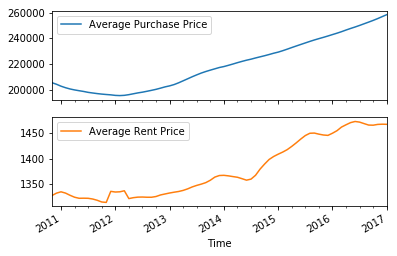

In [89]:
purchase_vs_rent_df.plot.line(subplots=True)